# Packages

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

---

# Dataset

### Data Source

link: https://www.kaggle.com/ionaskel/laptop-prices

In [71]:
# read csv file
df = pd.read_csv('laptop_price.csv', delimiter=',', encoding='ISO-8859-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [72]:
df.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
884,895,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.00
454,461,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.36kg,979.00
1275,1293,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00
113,116,HP,Probook 440,Notebook,14.0,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,4GB,500GB HDD,Intel UHD Graphics 620,Windows 10,1.63kg,722.00
448,455,MSI,GV62 7RD-1686NL,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,1027.74
646,654,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel Graphics 620,Windows 10,1.8kg,919.00
701,709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,399.00
776,785,Lenovo,Thinkpad P50,Notebook,15.6,4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16GB,512GB SSD,Nvidia Quadro M2000M,Windows 7,2.5kg,2370.00
1079,1094,HP,Probook 650,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,2.31kg,940.00
750,759,Lenovo,N23 (N3060/4GB/128GB/W10),Netbook,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,128GB SSD,Intel HD Graphics 400,Windows 10,1.4kg,475.00


### Pre-Procesing

**Selection: CPU Intel Core i7**

In [73]:
# select columns but 
cols = {
    'laptop_ID': 'id',
    'Product': 'product',
    'Inches': 'inches',
    'ScreenResolution': 'screen_resolution',
    'Cpu': 'cpu',
    'Ram': 'ram',
    'Weight': 'weight',
    'Price_euros': 'price',
}
df = df[list(cols.keys())]

# rename columns
df = df.rename(columns=cols)

# split cpu column into cpu_model and cpu_speed
df['cpu_model'] = df['cpu'].apply(lambda x: x.split()[:-1])
df['cpu_speed'] = df['cpu'].apply(lambda x: x.split()[-1])
df = df.drop(columns=['cpu'])

In [74]:
# filter rows with cpu_model == 'Intel' + 'Core'
df = df[df['cpu_model'].apply(lambda x: x[0] == 'Intel' and x[1] == 'Core' and x[2] == 'i7')]
# filter no cpu_version
df = df[df['cpu_model'].apply(lambda x: len(x) > 3)]

In [75]:
# add cpu_version column
df['cpu_version'] = df['cpu_model'].apply(lambda x: x[-1])

**Cleaning**

In [76]:
# filter rows with non-numerical cpu_version
df = df[df['cpu_version'].apply(lambda x: x[:4].isdigit())]

**Serialization**

In [77]:
# serialize: screen_resolution
df['screen_resolution'] = df['screen_resolution'].apply(lambda x: x.split()[-1].split('x'))
df['screen_resolution'] = df['screen_resolution'].apply(lambda x: int(x[0]) * int(x[1]))

# serialize: cpu_speed
df['cpu_speed'] = df['cpu_speed'].apply(lambda x: x[:-3]).astype(float)

# serialize: cpu_version
df['cpu_version'] = df['cpu_version'].apply(lambda x: x[:4]).astype(int)

# serialize: ram
df['ram'] = df['ram'].apply(lambda x: x[:-2]).astype(int)

# serialize: weight
df['weight'] = df['weight'].apply(lambda x: x[:-2]).astype(float)

**Normalization**

In [78]:
# min-max normalization allows to scale a dataset to a range between 0 and 1
def min_max_normalize(min:float, max:float, value:float) -> float:
    return (value - min) / (max - min)

def normalize(df, column):
    min = df[column].min()
    max = df[column].max()
    df[column] = df[column].apply(lambda x: min_max_normalize(min, max, x))
    return df

# Normalize data
df = normalize(df, 'inches')
df = normalize(df, 'screen_resolution')
df = normalize(df, 'cpu_version')
df = normalize(df, 'cpu_speed')
df = normalize(df, 'ram')
df = normalize(df, 'weight')

### Calculations

In [79]:
import math

def technical_value(inches:float, screen_resolution:float, cpu_version:float, cpu_speed:float, ram:float, weight:float) -> float:
    positive = inches * 0.2 + screen_resolution * 0.4 + cpu_version * 0.5 + cpu_speed * 0.9 + ram * 0.8
    negative = weight * 0.2
    return positive - negative

df['technical_value'] = df.apply(lambda x: technical_value(x['inches'], x['screen_resolution'], x['cpu_version'], x['cpu_speed'], x['ram'], x['weight']), axis=1)

### Stats

In [80]:
# stats
print(df.head(), '\n')
print(df.shape, '\n')
print(df.dtypes)

    id                                  product    inches  screen_resolution  \
8    9                          ZenBook UX430UN  0.254237           0.141403   
16  17                            Inspiron 3567  0.525424           0.141403   
24  25  15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)  0.525424           0.141403   
28  29                            Latitude 5590  0.525424           0.141403   
33  34                                   XPS 13  0.135593           0.650201   

         ram    weight   price                 cpu_model  cpu_speed  \
8   0.200000  0.125964  1495.0  [Intel, Core, i7, 8550U]   0.000000   
16  0.066667  0.357326   745.0  [Intel, Core, i7, 7500U]   0.818182   
24  0.066667  0.282776   659.0  [Intel, Core, i7, 8550U]   0.000000   
28  0.066667  0.275064  1298.0  [Intel, Core, i7, 8650U]   0.090909   
33  0.200000  0.100257  1869.0  [Intel, Core, i7, 8550U]   0.000000   

    cpu_version  technical_value  
8      0.953488         0.718960  
16     0.465116       

### Analysis

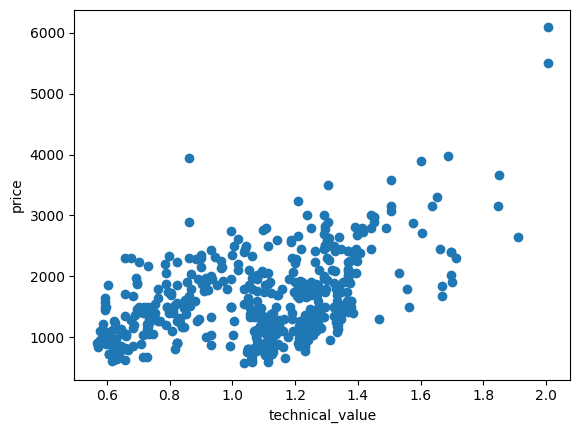

In [81]:
# graph weight (x) vs price (y)
plt.scatter(df['technical_value'], df['price'])
plt.xlabel('technical_value')
plt.ylabel('price')
plt.show()
plt.close()

---

# Training

**Dataset**

In [82]:
# split dataset into X and y
X = df[['technical_value']]
y = df['price']

# select 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

**Model**

In [83]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [84]:
# train
model.fit(X_train, y_train)

# score
model.score(X_test, y_test)

0.08731275339650124

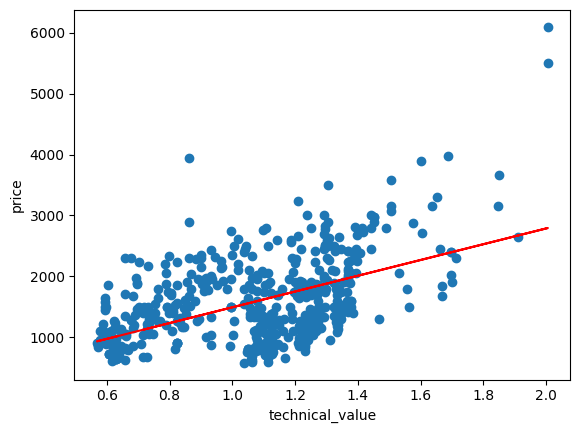

In [85]:
# visualize the fit line over the data
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('technical_value')
plt.ylabel('price')
plt.show()
plt.close()

In [86]:
# check the MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model.predict(X_test))

321431.7558401842

In [87]:
# check the RMSE
math.sqrt(mean_squared_error(y_test, model.predict(X_test)))

566.9495178939517